In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
fichero = pd.read_csv("DATOS/attacks_sin_columnas.csv")

1. ¿Cuál es la frecuencia de cada una de las categorías de la columna sex?

In [5]:
fichero.head(2)

,case_number,unnamed:_0,year,type,country,area,location,activity,name,sex_,age,time,species_,href
0,2018.06.25,0,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2018.06.18,1,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...


In [6]:
cantidad_sex = fichero["sex_"].value_counts()
cantidad_sex


M      4939
F       619
M         2
N         2
lli       1
.         1
Name: sex_, dtype: int64

In [7]:
fichero[fichero["sex_"]=="lli"]

,case_number,unnamed:_0,year,type,country,area,location,activity,name,sex_,age,time,species_,href
1617,2004.11.11.b,1624,2004.0,Unprovoked,USA,California,"Bunkers, Humboldt Bay, Eureka, Humboldt County",Surfing,Brian Kang,lli,38,13h30,5.5 m [18'] white shark,http://sharkattackfile.net/spreadsheets/pdf_di...


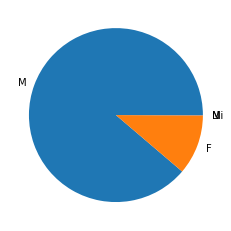

In [8]:
x = (4939, 619, 2, 2, 1, 1)
plt.figure()
plt.pie(x, labels =("M", "F", "M", "N", "Lli", ".") )
plt.show()

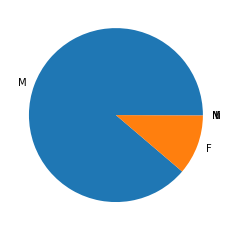

In [9]:
#Otra forma de sacar el mismo gráficos sería:
z = list(cantidad_sex.index)
y = list(np.array(cantidad_sex))
plt.figure()
plt.pie(y, labels = z )
plt.show()

2. ¿Cuál es el porcentaje de nulos por columna? Usa un pie chart donde incluyáis el porcentaje de cada variable en el interior del quesito. 

In [10]:
fichero.isnull().sum()

case_number       1
unnamed:_0        0
year              0
type              4
country          40
area            408
location        488
activity        511
name            200
sex_            550
age            2666
time           3180
species_       2705
href              0
dtype: int64

In [11]:
nulo = pd.DataFrame(fichero.isnull().sum())
nulo

,0
case_number,1
unnamed:_0,0
year,0
type,4
country,40
area,408
location,488
activity,511
name,200
sex_,550


In [12]:
etiqueta = list(nulo.index)


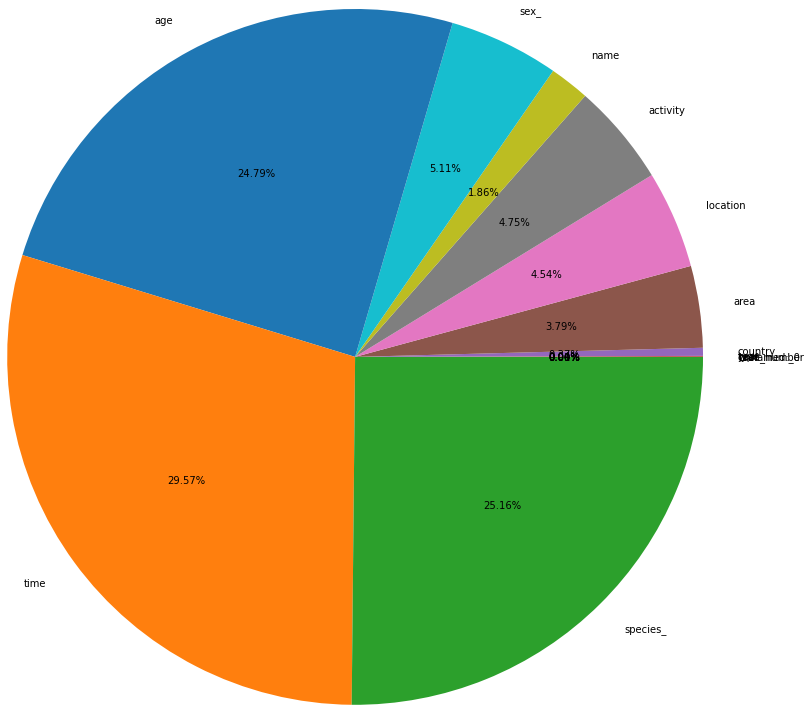

In [13]:
plt.figure()
plt.pie(nulo[0], labels = etiqueta, autopct="%1.2f%%", radius=4) 
plt.show()

3. ¿Cuál es el número total de valores únicos de cada una de las columnas categóricas del DataFrame?

In [30]:
# Sacamos las categorias.

fichero.iloc[0].unique()

array(['2018.06.25', 0, 2018.0, 'Boating', 'USA', 'California',
       'Oceanside, San Diego County', 'Paddling', 'Julie Wolfe', 'F',
       '57', '18h00', 'White shark',
       'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.25-Wolfe.pdf'],
      dtype=object)

In [32]:
dict_vacio = {}

for col in fichero:
    
    #print( col, fichero[col].dtype)
    if fichero[col].dtype == "object":
        #print(col)
        #print(fichero[col].unique())
        dict_vacio.update({col : len(fichero[col].unique())})
        #print(len(fichero[col].unique()))
        

In [33]:
# Comprobamos que ha funcionado el bucle
dict_vacio

{'case_number': 6114,
 'type': 9,
 'country': 202,
 'area': 792,
 'location': 4021,
 'activity': 1485,
 'name': 5119,
 'sex_': 7,
 'age': 157,
 'time': 367,
 'species_': 1530,
 'href': 6099}

In [35]:
tabla_diccionario = pd.DataFrame( list(dict_vacio.items()), columns= ['categorías', 'valores'])
tabla_diccionario

,categorías,valores
0,case_number,6114
1,type,9
2,country,202
3,area,792
4,location,4021
5,activity,1485
6,name,5119
7,sex_,7
8,age,157
9,time,367


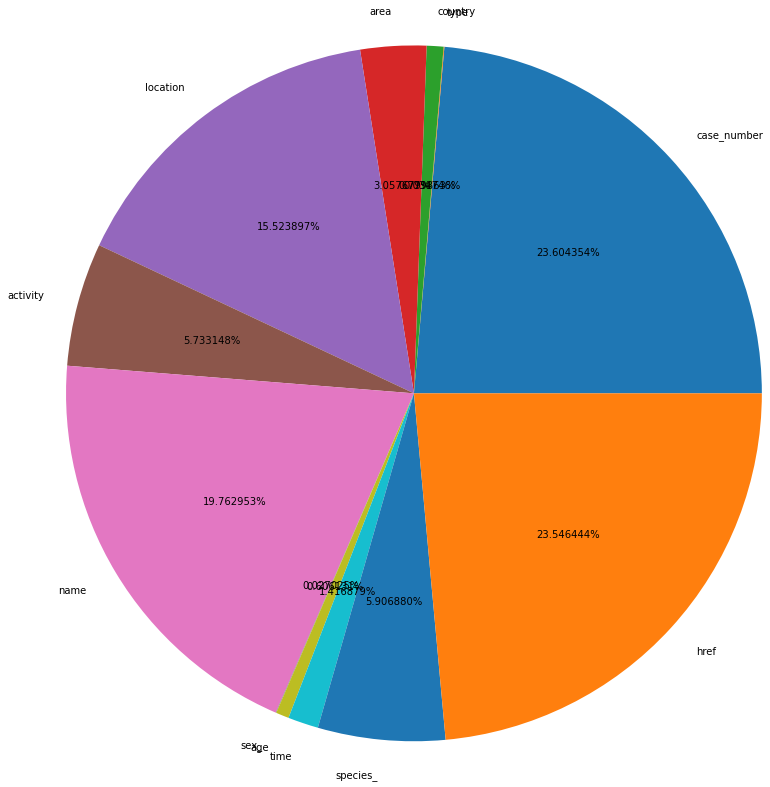

In [36]:
# Con esta tabla sacamos las gráficas.

plt.figure()
plt.pie(tabla_diccionario["valores"], labels= tabla_diccionario["categorías"], autopct= "%1f%%", radius= 4)
plt.show()

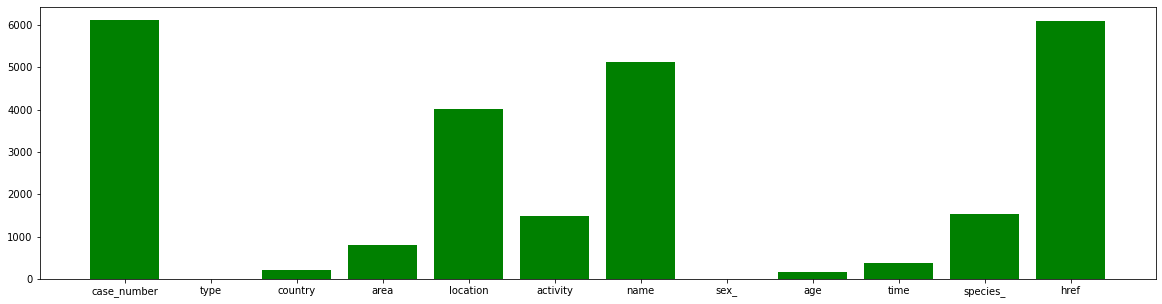

In [37]:
# Como las etiquetas se superponen un poco probamos hacer un barplot para visualizar mejor.

plt.figure(figsize=(20,5))
plt.bar(tabla_diccionario["categorías"], tabla_diccionario["valores"], color="green")
plt.show()

4. Filtrad los datos para quedarnos solo con los datos de USA.

In [16]:
estado_usa = fichero[fichero["country"]=="USA"]
estado_usa.head(2)

,case_number,unnamed:_0,year,type,country,area,location,activity,name,sex_,age,time,species_,href
0,2018.06.25,0,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2018.06.18,1,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...


- ¿Cuántos ataques de tiburones hubo en USA a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante.

In [17]:
siglo_xxi = estado_usa[estado_usa["year"] >= 2000]
#siglo_xxi.info()

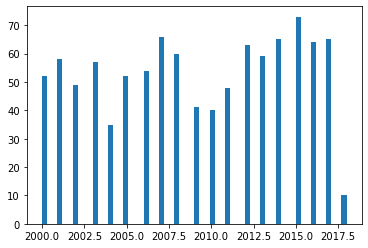

In [18]:
#Probamos el número de ataques por años a partir del 2000
plt.figure()

plt.hist(x= siglo_xxi["year"], bins=60)

plt.show()

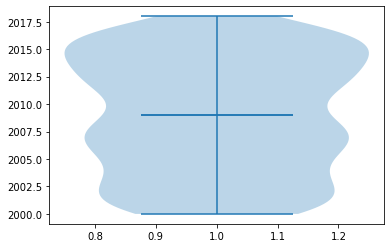

In [19]:
#
plt.figure()

plt.violinplot(siglo_xxi["year"], showmedians=True, showmeans=True)

plt.show()

- En función del tipo, ¿cuántos ataques de tiburones de cada tipo hubo en USA? Muestra los resultados en un gráfico de línea.

In [38]:
estado_usa.columns

Index(['case_number', 'unnamed:_0', 'year', 'type', 'country', 'area',
       'location', 'activity', 'name', 'sex_', 'age', 'time', 'species_',
       'href'],
      dtype='object')

In [40]:
variable_tiburones = estado_usa["type"].value_counts().reset_index()
variable_tiburones

,index,type
0,Unprovoked,1697
1,Provoked,205
2,Invalid,191
3,Boating,52
4,Sea Disaster,32
5,Boat,23


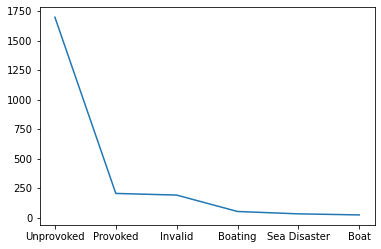

In [41]:
plt.figure()
plt.plot( variable_tiburones["index"], variable_tiburones["type"]  )
plt.show()

5. Filtrad los datos para Spain:

In [42]:
españa = fichero[fichero["country"]=="SPAIN"]

- ¿Cuántos ataques de tiburones hubo en España a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante.

In [43]:
españa_tiempo = españa[españa["year"] >= 2000]

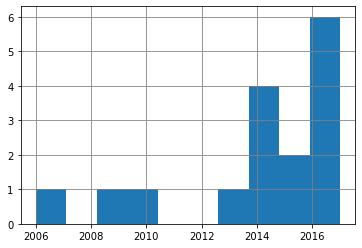

In [53]:
plt.figure()
plt.hist(españa_tiempo["year"])
plt.grid(color="grey")
plt.show()

- En función del tipo, ¿cuántos ataques de cada tipo de tiburones hubo en España? Muestra los resultados en un gráfico de línea.

In [55]:
tiburones_españa = españa["species_"].value_counts().reset_index()
tiburones_españa

,index,species_
0,Blue shark,3
1,Angel shark,3
2,16' shark,2
3,Shark involvement prior to death unconfirmed,2
4,Shark involvement not confirmed,2
5,Shark involvement questionable,2
6,"Porbeagle, 1.5 m",1
7,"Questionable, 2m shark suspected",1
8,2.5 m shark,1
9,Questionable,1


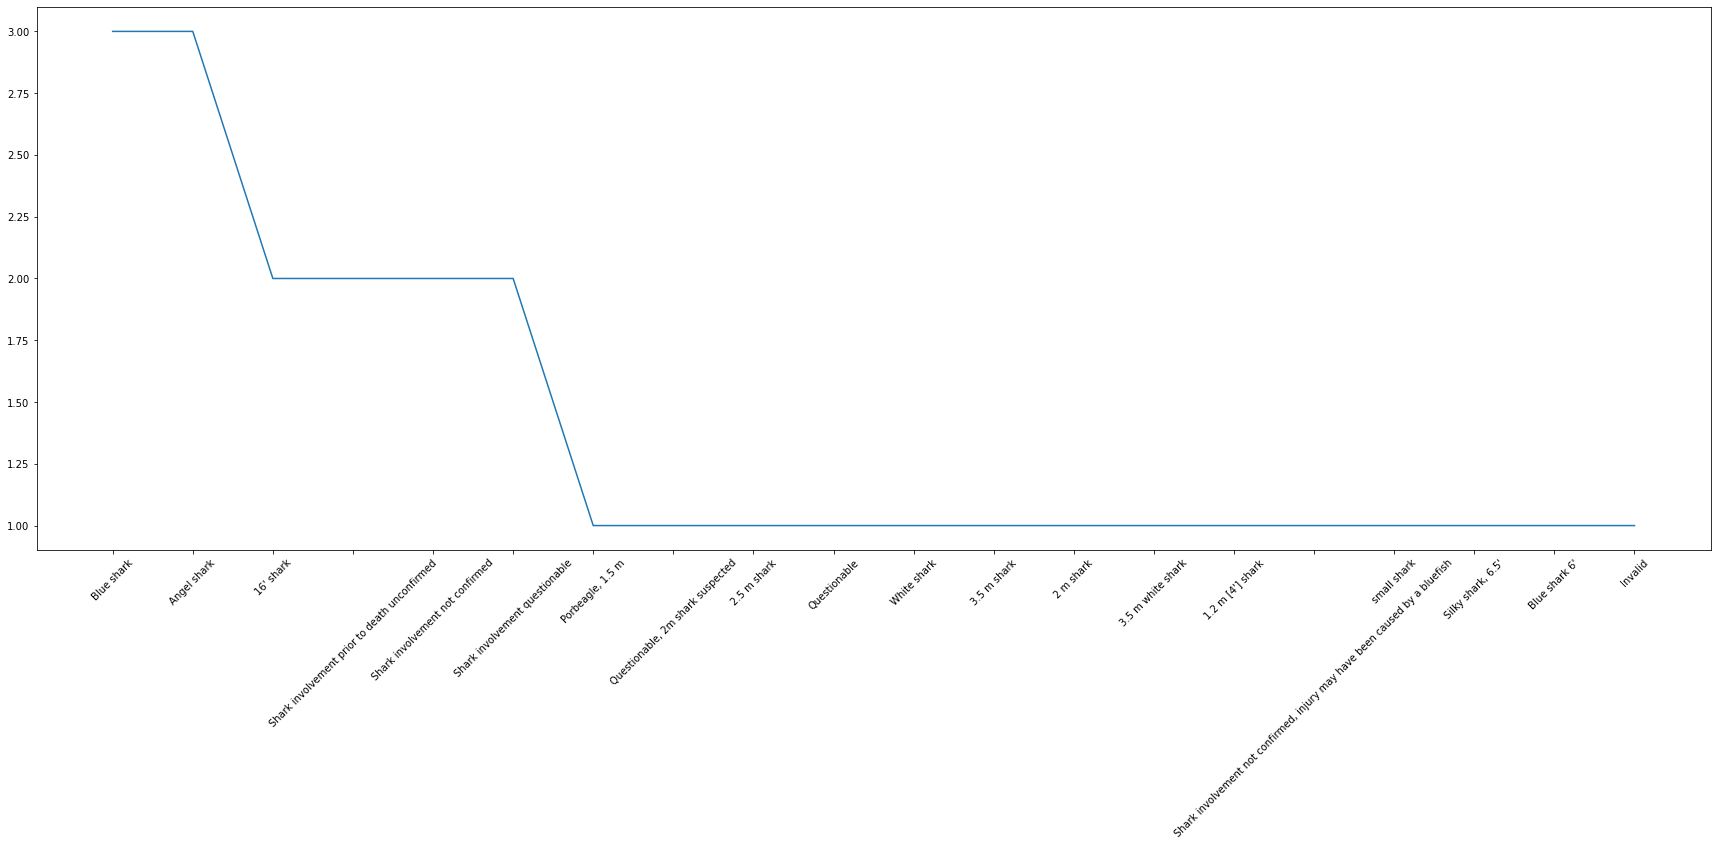

In [61]:
plt.figure(figsize=(30,10))
plt.plot(tiburones_españa["index"], tiburones_españa["species_"])
plt.xticks(rotation = 45)
plt.show()